In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data exploration

In [6]:
data = pd.read_csv('data/train.csv')


In [9]:
print(data.head(5))
print(data.describe())
print("Nº Regiones afectadas ", data['Country/Region'].nunique())
print("Primer registro", min(data['Date']), " a último registro", max(data['Date']), ", un total de", data['Date'].nunique(), " dias")

   Id Province/State Country/Region   Lat  Long        Date  ConfirmedCases  \
0   1            NaN    Afghanistan  33.0  65.0  2020-01-22             0.0   
1   2            NaN    Afghanistan  33.0  65.0  2020-01-23             0.0   
2   3            NaN    Afghanistan  33.0  65.0  2020-01-24             0.0   
3   4            NaN    Afghanistan  33.0  65.0  2020-01-25             0.0   
4   5            NaN    Afghanistan  33.0  65.0  2020-01-26             0.0   

   Fatalities  
0         0.0  
1         0.0  
2         0.0  
3         0.0  
4         0.0  
                Id           Lat          Long  ConfirmedCases    Fatalities
count  17040.00000  17040.000000  17040.000000    17040.000000  17040.000000
mean   13190.00000     26.287693      4.766191      285.089613      9.829167
std     7624.68379     22.935124     79.923372     3318.442133    148.005703
min        1.00000    -41.454500   -157.498300        0.000000      0.000000
25%     6595.50000     13.145425    -71.5163

## Muertes globales por dia

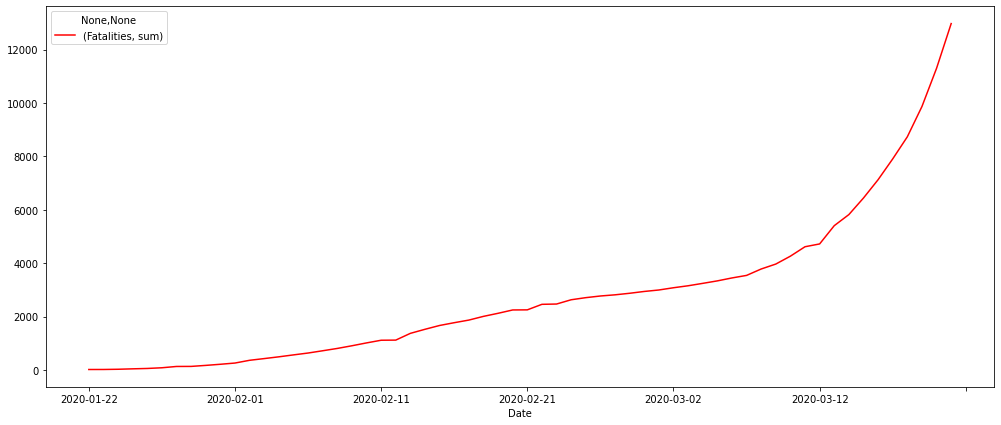

In [15]:
fig, (ax1) = plt.subplots(1, 1, figsize=(17,7))
fatalities_total_date = data.groupby(['Date']).agg({'Fatalities':['sum']})
fatalities_total_date.plot(ax=ax1, color='red')

## Numero de casos confirmados

In [104]:
def cases_days(data, country):
    cases = data[(data['Country/Region']==country) & data['ConfirmedCases']!=0].groupby(['Date']).agg({'ConfirmedCases':['sum']})
    cases['day'] = [x for x in range(len(cases.index))]
    cases.columns = ['confirmed-{}'.format(country), 'day']
    cases.columns
    cases['Factor'] = cases['confirmed-{}'.format(country)]/cases['confirmed-{}'.format(country)].shift(1)
    return cases

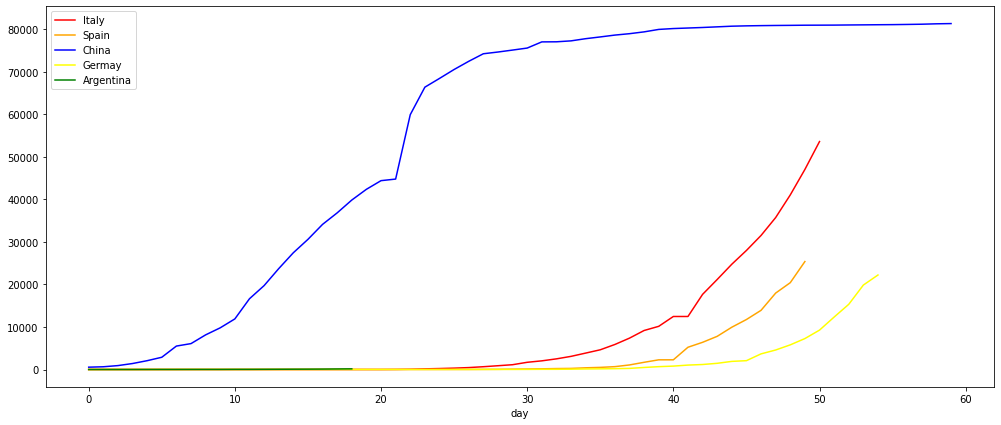

<Figure size 1080x1080 with 0 Axes>

In [105]:


# contamos los dias desde el primer dato
fig, (ax1) = plt.subplots(1, 1, figsize=(17,7))

italy_cases = cases_days(data, 'Italy')
spain_cases = cases_days(data, 'Spain')
china_cases = cases_days(data, 'China')
germany_cases = cases_days(data, 'Germany')
argentina_cases = cases_days(data, 'Argentina')

plt.figure(figsize=(15,15))


italy_cases.set_index('day')['confirmed-Italy'].plot(ax=ax1, color='red')
spain_cases.set_index('day')['confirmed-Spain'].plot(ax=ax1, color='orange')
china_cases.set_index('day')['confirmed-China'].plot(ax=ax1, color='blue')
germany_cases.set_index('day')['confirmed-Germany'].plot(ax=ax1, color='yellow')
argentina_cases.set_index('day')['confirmed-Argentina'].plot(ax=ax1, color='green')


ax1.legend(["Italy", "Spain", "China", "Germay", "Argentina"]);


# Factor incremental diario calculado para cada Pais

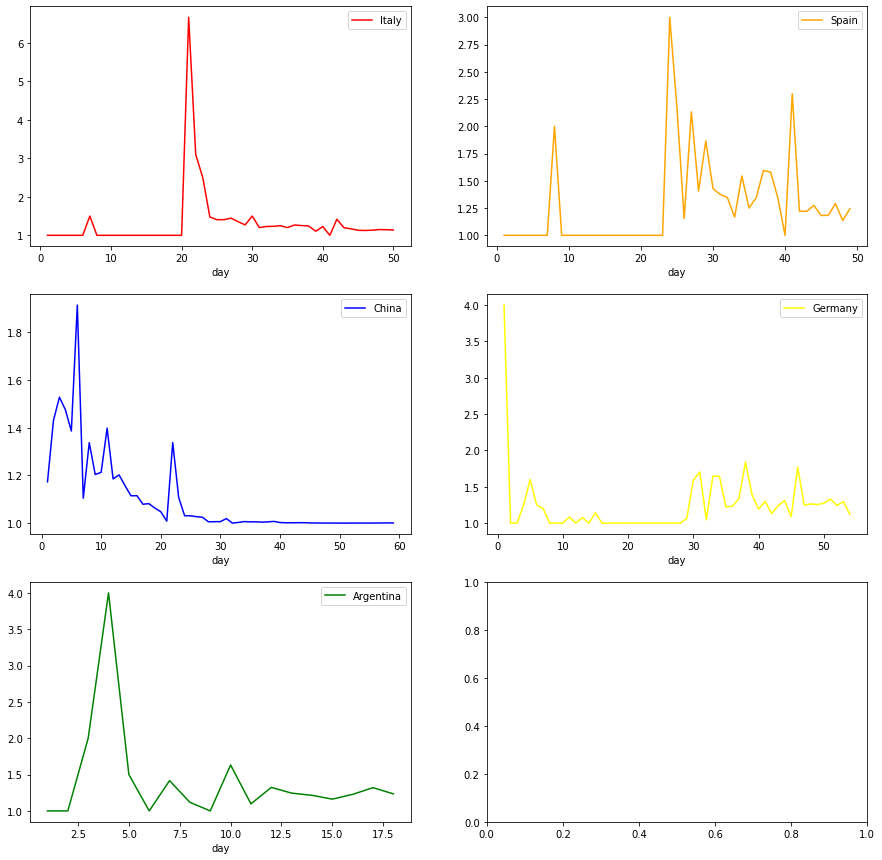

In [107]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 2, figsize=(15,15))


italy_cases.set_index('day')['Factor'].plot(ax=ax1[0], color='red')
spain_cases.set_index('day')['Factor'].plot(ax=ax1[1], color='orange')
china_cases.set_index('day')['Factor'].plot(ax=ax2[0], color='blue')
germany_cases.set_index('day')['Factor'].plot(ax=ax2[1], color='yellow')
argentina_cases.set_index('day')['Factor'].plot(ax=ax3[0], color='green')

ax1[0].legend(["Italy", "day"]);
ax1[1].legend(["Spain", "day"]);
ax2[0].legend(["China", "day"]);
ax2[1].legend(["Germany", "day"]);
ax3[0].legend(["Argentina", "day"]);

# Factor paises todos juntos

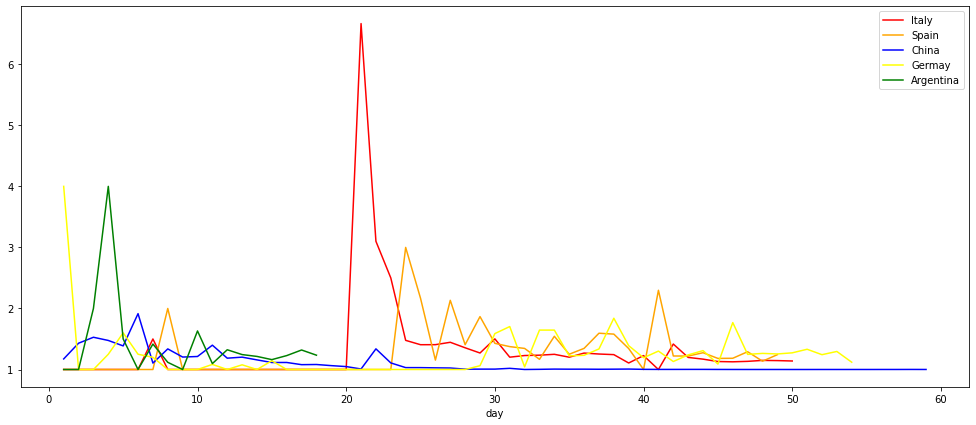

In [110]:
# contamos los dias desde el primer dato
fig, (ax1) = plt.subplots(1, 1, figsize=(17,7))


italy_cases.set_index('day')['Factor'].plot(ax=ax1, color='red')
spain_cases.set_index('day')['Factor'].plot(ax=ax1, color='orange')
china_cases.set_index('day')['Factor'].plot(ax=ax1, color='blue')
germany_cases.set_index('day')['Factor'].plot(ax=ax1, color='yellow')
argentina_cases.set_index('day')['Factor'].plot(ax=ax1, color='green')


ax1.legend(["Italy", "Spain", "China", "Germay", "Argentina"]);

# Factor solo Spain and Italy

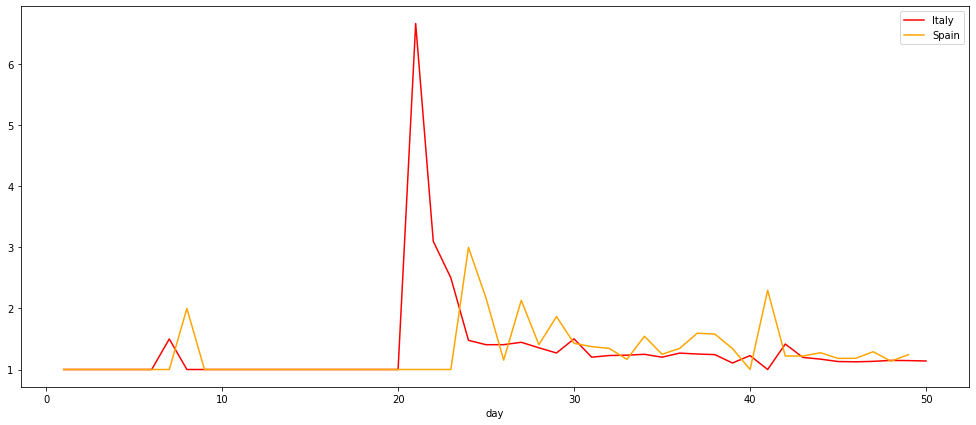

In [111]:
# contamos los dias desde el primer dato
fig, (ax1) = plt.subplots(1, 1, figsize=(17,7))


italy_cases.set_index('day')['Factor'].plot(ax=ax1, color='red')
spain_cases.set_index('day')['Factor'].plot(ax=ax1, color='orange')



ax1.legend(["Italy", "Spain"]);

# Es intereante ver como evoluciona el Factor en los ultimos N days en los paises y de manera sincronizados, en este caso 

In [188]:
def sync_last_days(data, ndays):
    last = data[len(data.set_index('day')['Factor'])-ndays:]
    last['lastday'] = [x for x in range(len(last.index))]
    return last.set_index('lastday')

/home/angel/Desktop/git/covid19/venv/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


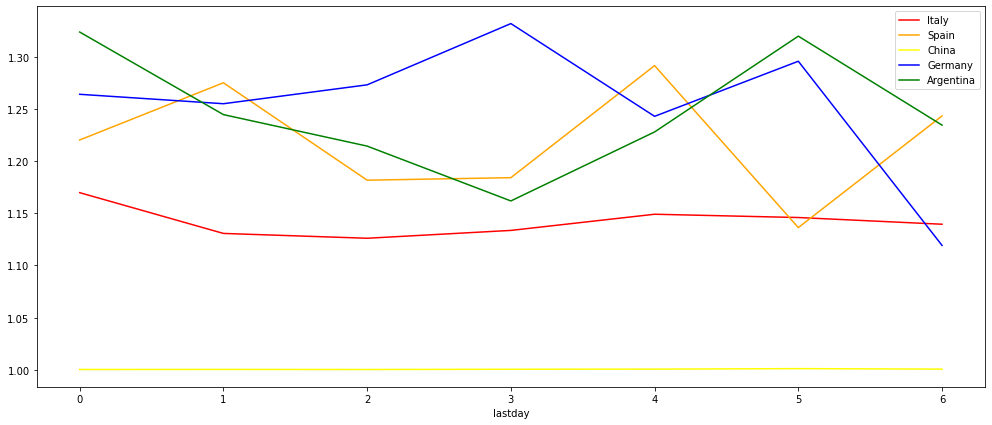

In [191]:
LAST_DAYS = 7
fig, (ax1) = plt.subplots(1, 1, figsize=(17,7))


last7_days_it = sync_last_days(italy_cases, LAST_DAYS)
last7_days_es = sync_last_days(spain_cases, LAST_DAYS)
last7_days_ger  = sync_last_days(germany_cases, LAST_DAYS)
last7_days_china =  sync_last_days(china_cases, LAST_DAYS)
last7_days_arg = sync_last_days(argentina_cases, LAST_DAYS)

last7_days_it['Factor'].plot(ax=ax1, color='red')
last7_days_es['Factor'].plot(ax=ax1, color='orange')
last7_days_china['Factor'].plot(ax=ax1, color='yellow')
last7_days_ger['Factor'].plot(ax=ax1, color='blue')
last7_days_arg['Factor'].plot(ax=ax1, color='green')


ax1.legend(["Italy", "Spain", "China", "Germany", "Argentina"]);